# <center><strong> Brain Tumor Detection </strong></center>
-----------------------------------------------------------

#### ***By Mohamed Jamyl***

http://linkedin.com/in/mohamed-jamyl

https://www.kaggle.com/mohamedjamyl

https://github.com/Mohamed-Jamyl

--------------------------------------------

## <center><strong> Project Overview </strong></center>

### **Early detection and classification of brain tumors is an important research domain in the field of medical imaging and accordingly helps in selecting the most convenient treatment method to save patients life therefore**.
--------------------------------
### ***1- Glioma***
- #### **Definition** : A common type of brain tumor that starts in the glial cells, which support nerve cells in the brain and spinal cord.

- #### **Characteristics**:

    - ##### Can be benign or malignant.

    - ##### Grows within brain tissue.

    - ##### Symptoms include headaches, seizures, and difficulty with thinking or movement.
 

### ***2- Meningioma***
- #### **Definition**: Originates from the meninges, the membranes that cover the brain and spinal cord.

- #### **Characteristics**:

    - ##### Often benign (non-cancerous).

    - ##### May press on the brain or nerves as it grows.

    - ##### Symptoms depend on its location and may include headaches, vision changes, or behavioral changes.


### ***3- Notumor***
- #### **Definition** : No tumor is detected in the image.

- #### **Purpose** : This category is used as a reference or control, helping the model learn to distinguish between healthy and tumorous images.

### ***4- Pituitary***
- #### **Definition** : A tumor growing in the pituitary gland, a small gland at the base of the brain that controls hormones.

- #### **Characteristics** :

    - ##### Can affect hormone production.

    - ##### Symptoms may include vision problems, headaches, or hormonal imbalances (e.g., weight gain, menstrual issues).


--------------------------------
--------------------------------

## **Import Libraries**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

2025-08-01 10:09:23.720911: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754042964.006541      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754042964.088943      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


--------------------------------------
-------------------------------------

In [3]:
train_data = '/kaggle/input/brain-tumor-mri-dataset/Training'
categories = ['glioma','meningioma','notumor','pituitary']

In [4]:
folds = [os.path.join(train_data, catg) for catg in categories]
folds

['/kaggle/input/brain-tumor-mri-dataset/Training/glioma',
 '/kaggle/input/brain-tumor-mri-dataset/Training/meningioma',
 '/kaggle/input/brain-tumor-mri-dataset/Training/notumor',
 '/kaggle/input/brain-tumor-mri-dataset/Training/pituitary']

In [5]:
for fold in folds:
    print(fold.split('/')[5], ':' ,len(os.listdir(fold)))

glioma : 1321
meningioma : 1339
notumor : 1595
pituitary : 1457


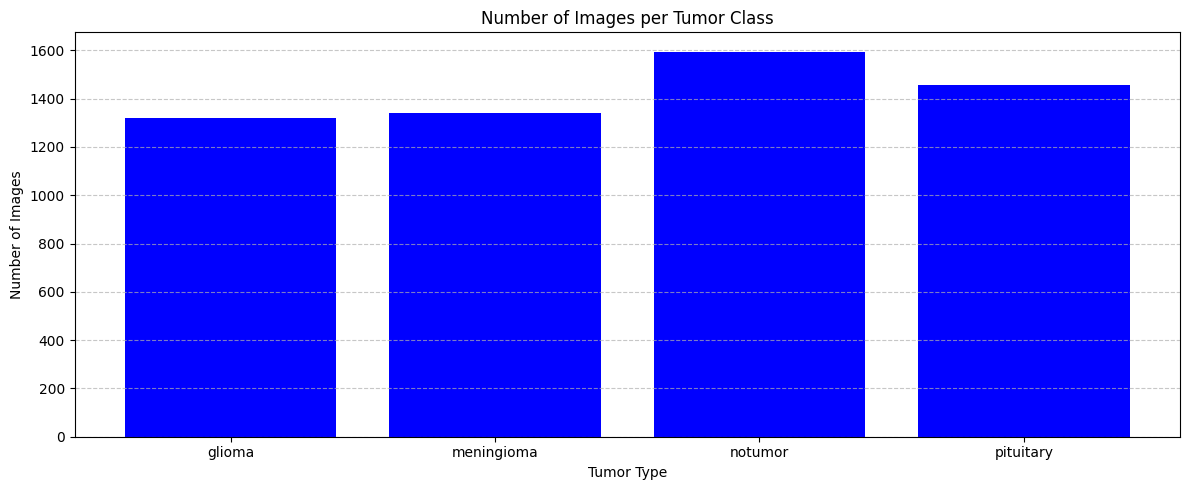

In [6]:
# Data extracted from output
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
values = [1321, 1339, 1595, 1457]

plt.figure(figsize=(12, 5))
plt.bar(labels, values, color='blue')
plt.title('Number of Images per Tumor Class')
plt.xlabel('Tumor Type')
plt.ylabel('Number of Images')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

--------------------------------------

#### **Image array and dimension**


In [7]:
def img_array_dim(folder):
    i = 0
    for img in os.listdir(folder):
        i +=1
        img_array =	cv2.imread(os.path.join(folder, img))
        print(f'Dim : {img_array.shape}')
        print('-------------------')
        print(img_array)
        if i == 1:
            break

In [8]:
# glioma
img_array_dim(folds[0])

Dim : (512, 512, 3)
-------------------
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [9]:
# meningioma
img_array_dim(folds[1])

Dim : (512, 512, 3)
-------------------
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [10]:
# notumor
img_array_dim(folds[2])

Dim : (225, 225, 3)
-------------------
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [11]:
# pituitary
img_array_dim(folds[3])

Dim : (512, 512, 3)
-------------------
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


--------------------------------

#### **Show images**

In [12]:
def show_img(folder):
    images = [cv2.imread(os.path.join(folder, img)) for img in os.listdir(folder)]
    fig = plt.figure(figsize=(14, 6))
    x = 0 
    for i in range(len(images)):
        x+=1
        plt.subplot(2,4,i+1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(f'Image {i+1}') 
        if x == 8:
            break

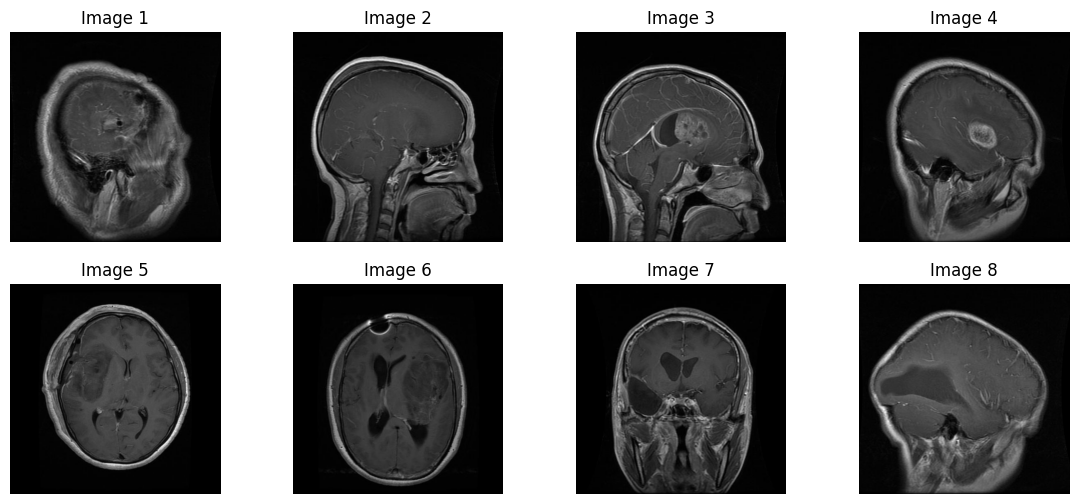

In [13]:
# glioma 
show_img(folds[0])

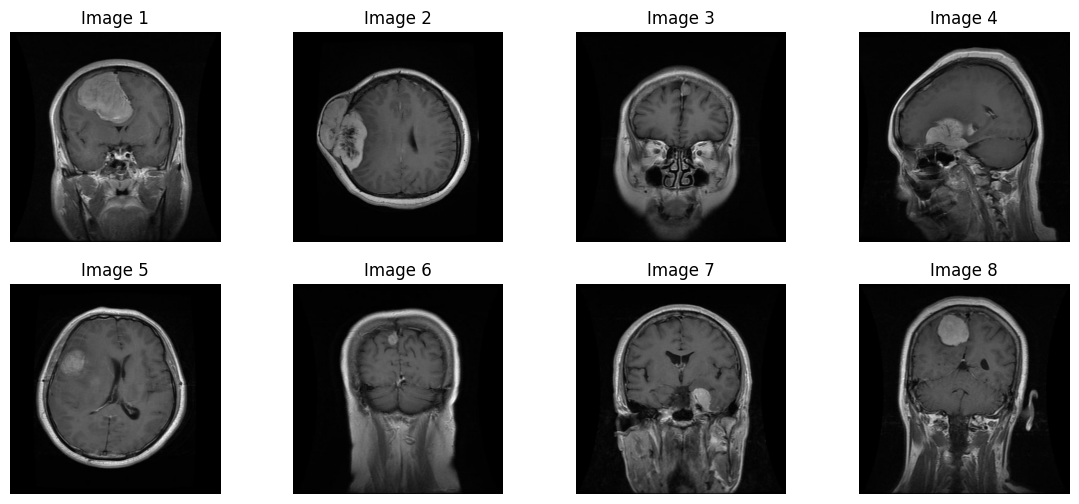

In [14]:
# meningioma
show_img(folds[1])

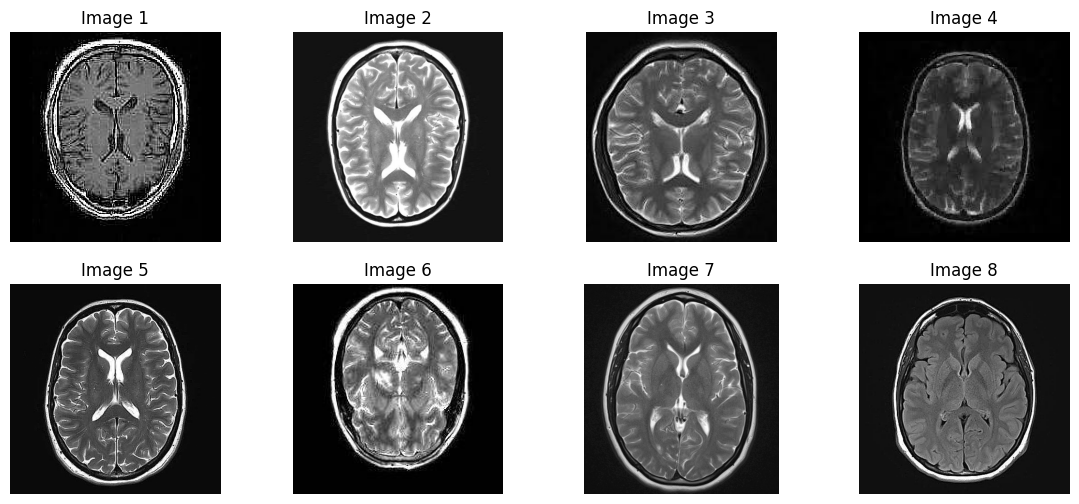

In [15]:
# notumor
show_img(folds[2])

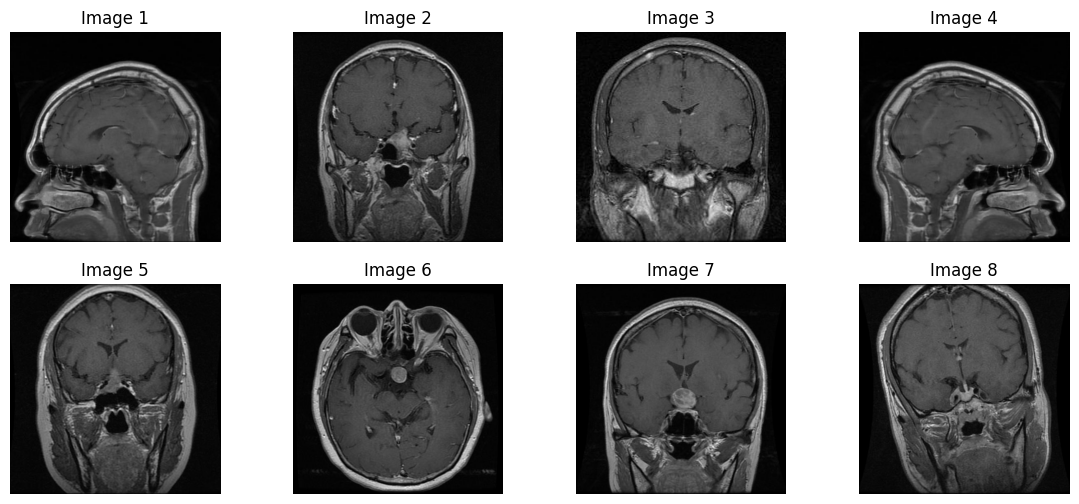

In [16]:
# pituitary
show_img(folds[3])

-----------------------------

#### **Show images with IR**

In [17]:
def show_img_with_IR(folder):
    images = [cv2.imread(os.path.join(folder, img)) for img in os.listdir(folder)]
    fig = plt.figure(figsize=(14, 6))
    x = 0 
    for i in range(len(images)):
        x+=1
        plt.subplot(2,4,i+1)
        img_gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
        img_colored = cv2.applyColorMap(img_gray, cv2.COLORMAP_JET)
        plt.imshow(img_colored)
        plt.axis('off')
        plt.title(f'Image {i+1}') 
        if x == 8:
            break

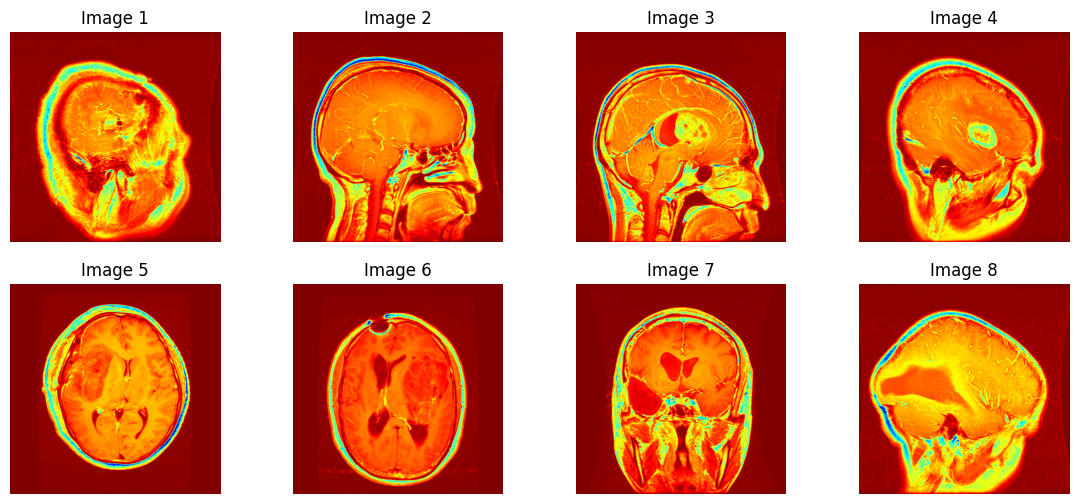

In [18]:
# glioma
show_img_with_IR(folds[0])

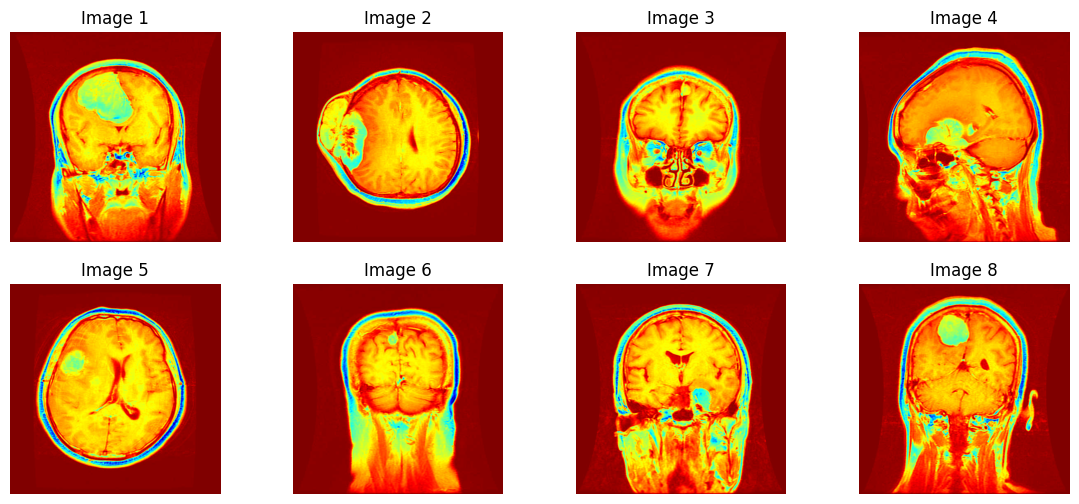

In [19]:
# meningioma
show_img_with_IR(folds[1])

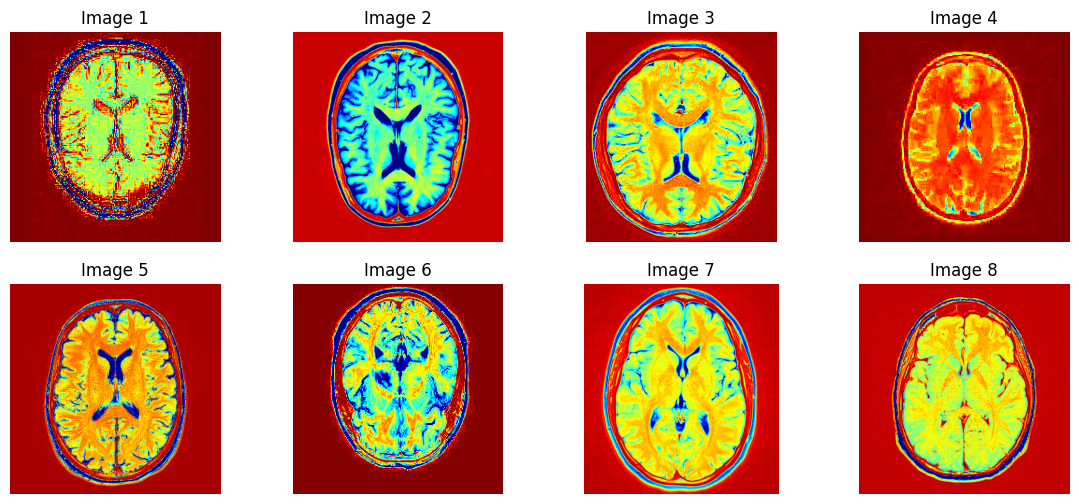

In [20]:
# notumor
show_img_with_IR(folds[2])

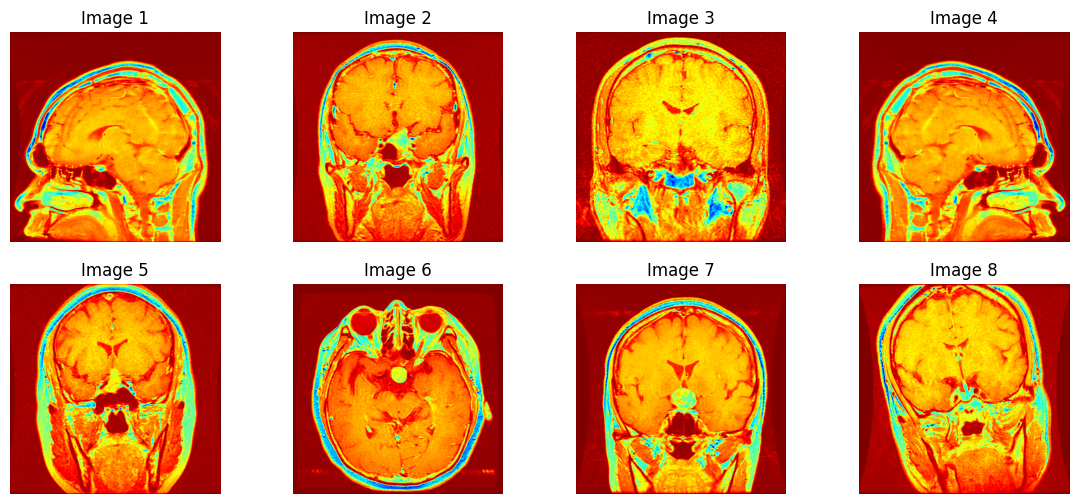

In [21]:
# pituitary
show_img_with_IR(folds[3])

-----------------------------

### **Detecting tumor**

In [22]:
def detect_tumor(folder):
    images = [cv2.imread(os.path.join(folder, img)) for img in os.listdir(folder)]
    fig = plt.figure(figsize=(14, 6))
    
    for i in range(2):
        plt.subplot(1,2,i+1)
        img_gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        img_colored = cv2.applyColorMap(img_gray, cv2.COLORMAP_JET)
        for contour in contours:
            if cv2.contourArea(contour) > 100:  
                (x, y), radius = cv2.minEnclosingCircle(contour)
                center = (int(x), int(y))
                radius = int(radius)
                cv2.circle(img_colored, center, radius, (0, 0, 255), 2)  
        
        plt.imshow(img_colored)
        plt.axis('off')
        plt.title(f'Image {i+1}') 
        
    plt.tight_layout()
    plt.show()

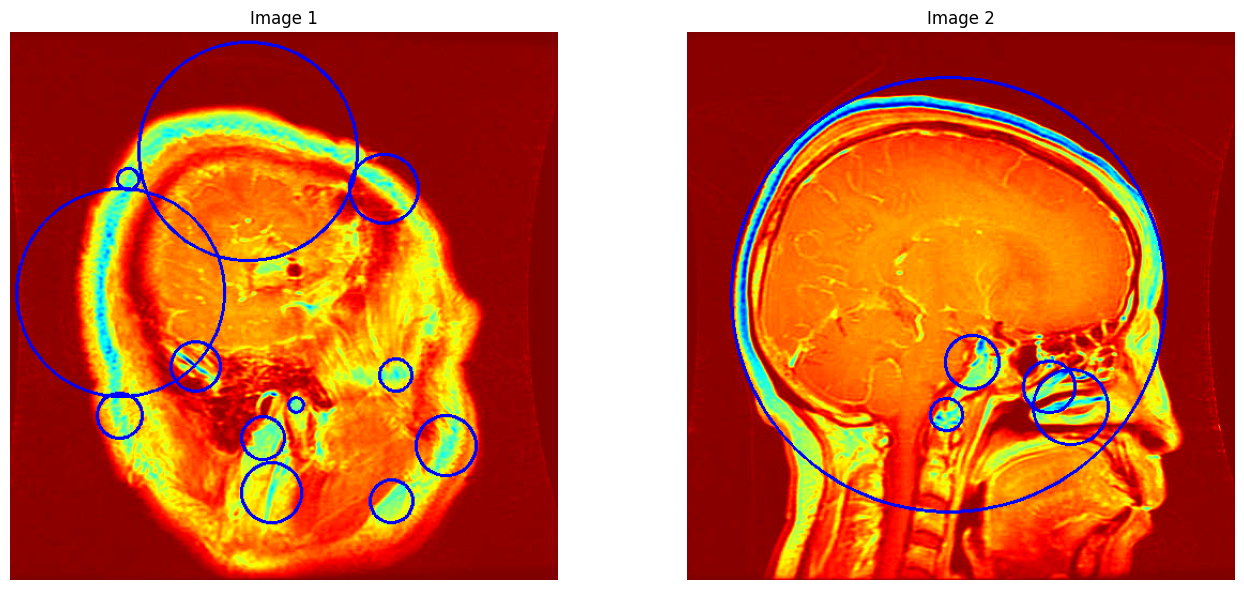

In [23]:
# glioma
detect_tumor(folds[0])

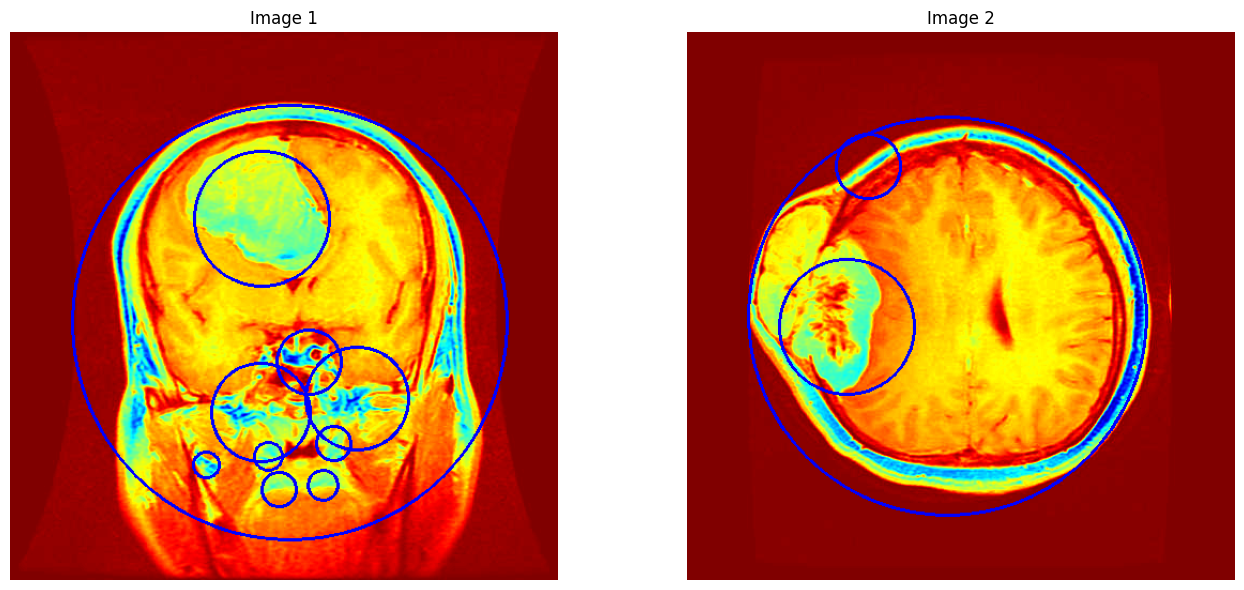

In [24]:
# meningioma
detect_tumor(folds[1])

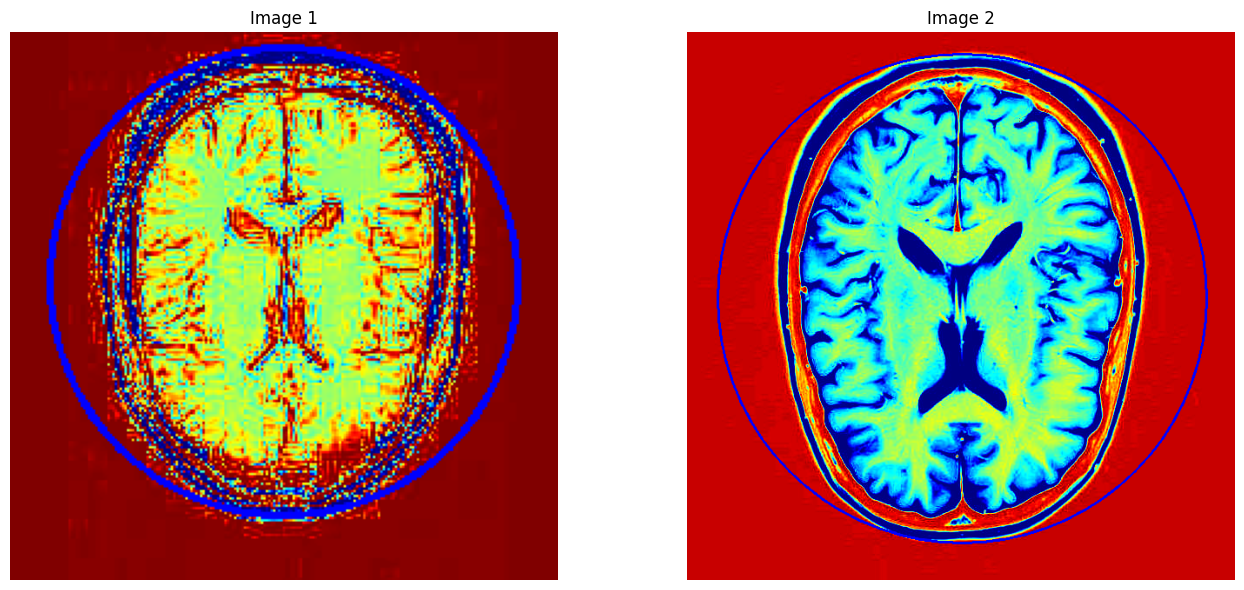

In [25]:
# notumor
detect_tumor(folds[2])

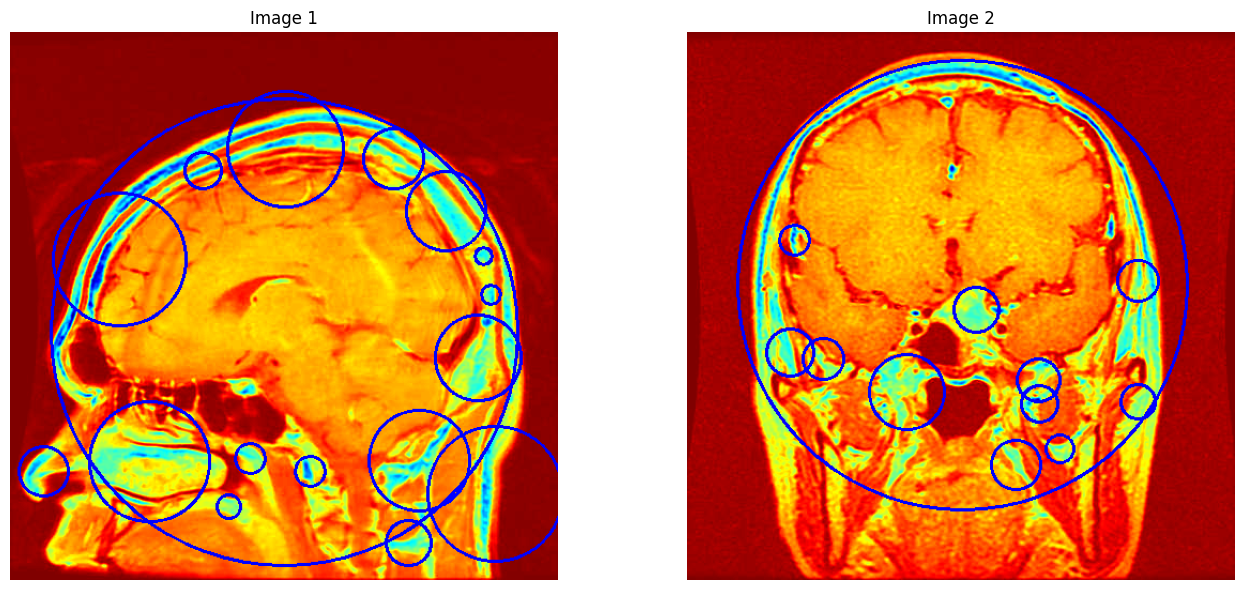

In [26]:
# pituitary
detect_tumor(folds[3])

---------------------------------

### **Checking sizes of images**

In [27]:
def checking_size(folder):
    AllSizes = []
    for	img	in os.listdir(folder):
        img_array = cv2.imread(os.path.join(folder, img))
        AllSizes.append(img_array.shape)
    print(set(AllSizes))

In [28]:
checking_size(folds[0])

{(512, 512, 3)}


In [29]:
checking_size(folds[1])

{(395, 367, 3), (1019, 1149, 3), (219, 224, 3), (237, 212, 3), (251, 205, 3), (245, 206, 3), (442, 442, 3), (395, 369, 3), (314, 329, 3), (212, 238, 3), (527, 552, 3), (354, 318, 3), (284, 324, 3), (218, 180, 3), (234, 216, 3), (264, 420, 3), (235, 214, 3), (216, 234, 3), (238, 212, 3), (546, 472, 3), (337, 305, 3), (439, 645, 3), (223, 200, 3), (395, 416, 3), (236, 200, 3), (223, 226, 3), (358, 314, 3), (342, 323, 3), (412, 300, 3), (224, 239, 3), (526, 530, 3), (340, 507, 3), (236, 213, 3), (624, 491, 3), (270, 250, 3), (554, 554, 3), (377, 341, 3), (398, 351, 3), (372, 341, 3), (252, 200, 3), (345, 338, 3), (500, 455, 3), (993, 825, 3), (354, 289, 3), (225, 209, 3), (369, 503, 3), (512, 512, 3), (410, 304, 3), (306, 278, 3), (214, 226, 3), (345, 300, 3), (339, 290, 3), (237, 213, 3), (396, 402, 3), (228, 221, 3), (394, 295, 3), (355, 330, 3), (235, 200, 3), (674, 534, 3), (427, 441, 3), (240, 210, 3), (398, 369, 3), (306, 306, 3), (249, 206, 3), (320, 497, 3), (320, 257, 3), (234, 2

In [30]:
checking_size(folds[2])

{(488, 504, 3), (263, 236, 3), (290, 236, 3), (717, 717, 3), (444, 468, 3), (243, 236, 3), (302, 216, 3), (674, 648, 3), (210, 233, 3), (530, 380, 3), (1446, 1375, 3), (512, 434, 3), (250, 201, 3), (274, 230, 3), (251, 447, 3), (252, 236, 3), (442, 442, 3), (249, 201, 3), (320, 296, 3), (228, 233, 3), (218, 233, 3), (725, 728, 3), (483, 430, 3), (248, 208, 3), (480, 853, 3), (600, 600, 3), (484, 405, 3), (417, 428, 3), (506, 444, 3), (223, 236, 3), (630, 630, 3), (614, 630, 3), (344, 320, 3), (228, 235, 3), (273, 236, 3), (236, 236, 3), (243, 200, 3), (504, 450, 3), (244, 206, 3), (470, 469, 3), (273, 251, 3), (214, 229, 3), (496, 453, 3), (474, 356, 3), (264, 235, 3), (248, 203, 3), (1024, 1024, 3), (295, 236, 3), (277, 235, 3), (217, 232, 3), (600, 494, 3), (247, 204, 3), (216, 232, 3), (238, 212, 3), (262, 224, 3), (280, 229, 3), (216, 236, 3), (244, 262, 3), (201, 210, 3), (236, 211, 3), (236, 255, 3), (490, 410, 3), (201, 236, 3), (442, 332, 3), (218, 225, 3), (777, 622, 3), (469,

In [31]:
checking_size(folds[3])

{(1280, 1280, 3), (903, 721, 3), (502, 502, 3), (400, 400, 3), (474, 474, 3), (512, 512, 3), (432, 470, 3), (681, 685, 3), (900, 940, 3), (378, 360, 3), (442, 442, 3), (210, 201, 3), (202, 202, 3), (741, 900, 3), (1365, 1365, 3), (256, 256, 3)}


--------------------------

### **Resizing images**

In [32]:
width, height = 200, 200
def resizing_img(folder):
    images = [cv2.resize((cv2.imread(os.path.join(folder, img))), (width, height)) for img in os.listdir(folder)]
    fig = plt.figure(figsize=(14, 6))
    x = 0 
    for i in range(len(images)):
        x+=1
        plt.subplot(2,4,i+1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(f'Image {i+1}') 
        if x == 8:
            break

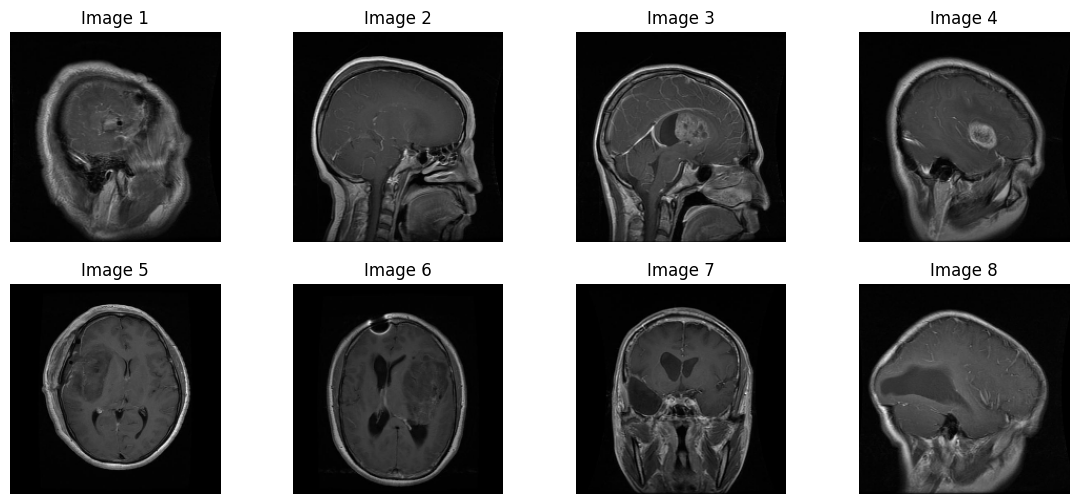

In [33]:
resizing_img(folds[0])

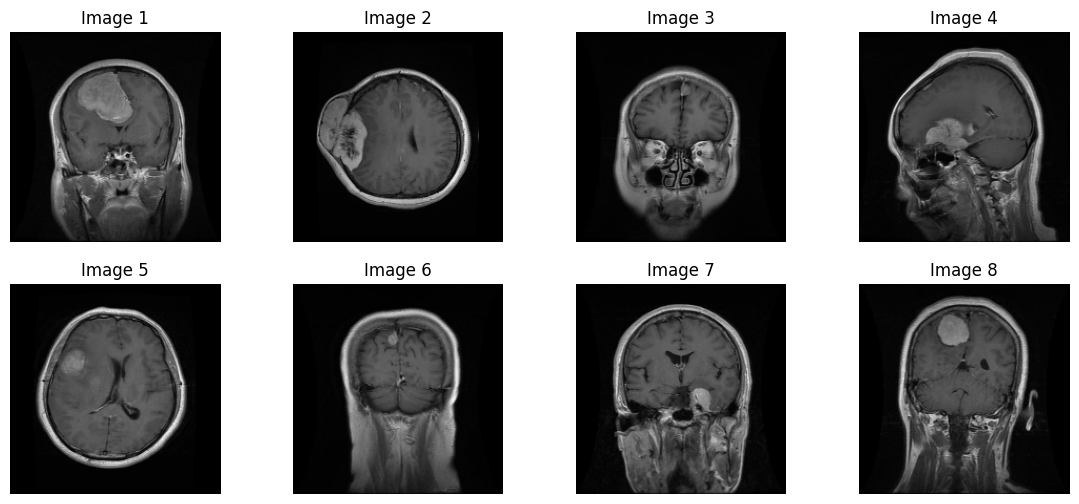

In [34]:
resizing_img(folds[1])

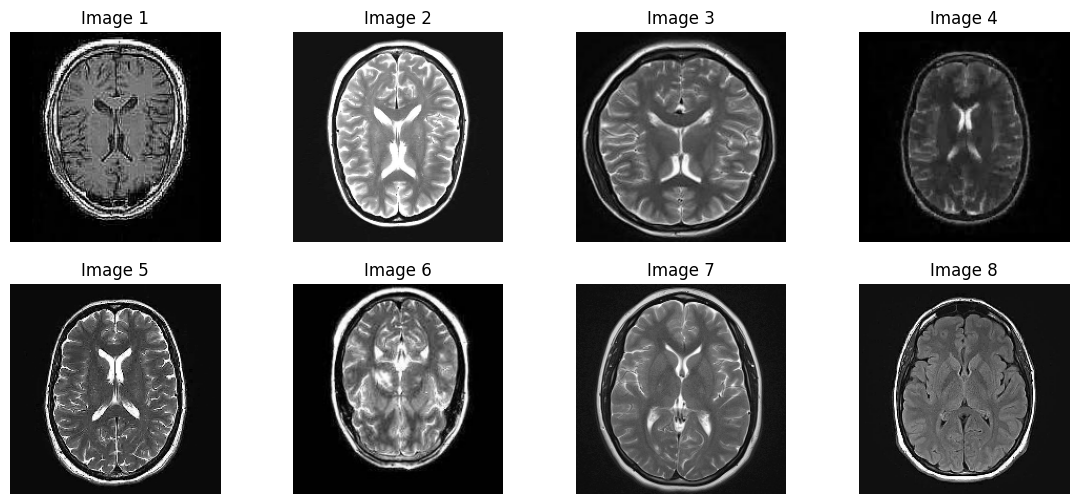

In [35]:
resizing_img(folds[2])

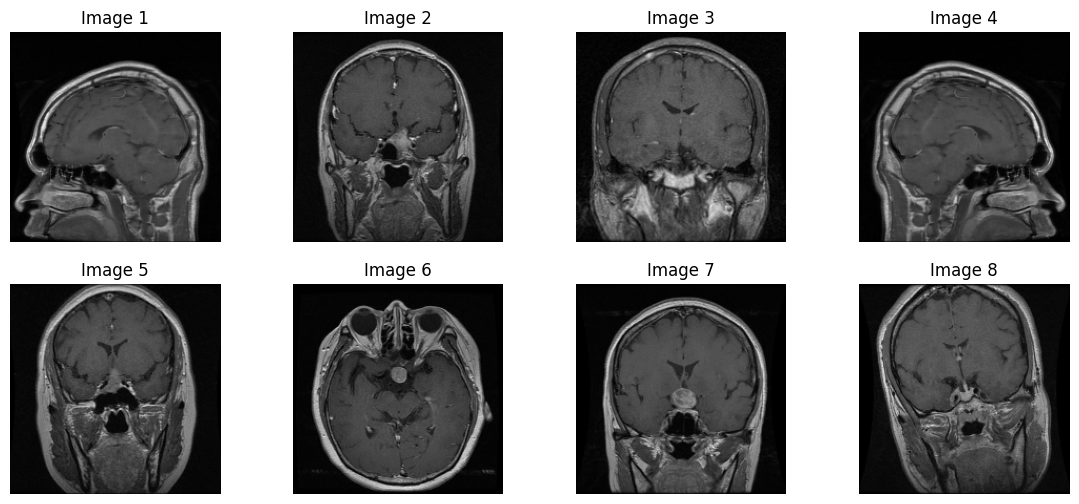

In [36]:
resizing_img(folds[3])

-------------------------------

### **Creating x and y**

In [37]:
x=[]
y=[]
for label, fold in enumerate(folds):
    for	img_name in	tqdm(os.listdir(fold)):
        img_path = os.path.join(fold, img_name)
        img	= cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img	= cv2.resize(img, (width, height))
        x.append(img)
        y.append(label)

100%|██████████| 1457/1457 [00:03<00:00, 439.74it/s]


In [38]:
len(x)

5712

In [39]:
len(y)

5712

In [40]:
x[0].shape

(200, 200)

In [41]:
x =	np.array(x).reshape(-1,	width, height, 1)	
y =	np.array(y)

In [42]:
x[0].shape

(200, 200, 1)

In [43]:
x[:1]

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]],

        [[2],
         [2],
         [2],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[2],
         [2],
         [2],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]]], dtype=uint8)

In [44]:
y

array([0, 0, 0, ..., 3, 3, 3])

In [45]:
y[:1]

array([0])

-----------------------
### **Spliting Data**
-------------------------------

In [46]:
 x_train, x_test, y_train, y_test =	train_test_split(x,y, train_size=0.8,random_state=1234)
 print(x_train.shape)
 print(x_test.shape)
 print(y_train.shape)
 print(y_test.shape)

(4569, 200, 200, 1)
(1143, 200, 200, 1)
(4569,)
(1143,)


------------------------------
### **Building Convolutional Neural Network**
------------------------------------

In [57]:
model = keras.models.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'VALID', input_shape = (height, width, 1)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size = (2,2), strides = (1,1)),

        keras.layers.Conv2D(filters = 64, kernel_size = (4,4), strides = (1,1), padding = 'VALID'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),

        keras.layers.Flatten(),
        keras.layers.Dense(32, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(64, activation = tf.nn.relu),
        #layers.Dropout(0.2),
        keras.layers.Dense(4, activation = tf.nn.softmax),
        ])

In [58]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 198, 198, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 197, 197, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 194, 194, 64)   │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 194, 194, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 194, 194, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 97, 97, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 602176)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │    19,269,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,305,572 (73.64 MB)

 Trainable params: 19,305,380 (73.64 MB)

 Non-trainable params: 192 (768.00 B)

---------------------------
### **Training Model**
---------------------------

In [60]:
early_stopping = keras.callbacks.EarlyStopping(	
				monitor='val_accuracy',	
				patience=4,										
				restore_best_weights=True)

history=model.fit(	
		x_train,y_train,	
        batch_size=40,
		steps_per_epoch	=80,
		epochs=50,	
        validation_split=0.1,
		verbose=1,	
		callbacks=[early_stopping])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 690s 9s/step - accuracy: 0.5137 - loss: 2.1709 - val_accuracy: 0.4398 - val_loss: 2.4695
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.7841 - loss: 0.6968 - val_accuracy: 0.5580 - val_loss: 1.5124
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 679s 8s/step - accuracy: 0.8656 - loss: 0.4004 - val_accuracy: 0.7330 - val_loss: 0.7759
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.8941 - loss: 0.3380 - val_accuracy: 0.8621 - val_loss: 0.4115
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 683s 9s/step - accuracy: 0.9305 - loss: 0.2463 - val_accuracy: 0.8775 - val_loss: 0.3779
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.9257 - loss: 0.2750 - val_accuracy: 0.8753 - val_loss: 0.4520
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 712s 9s/step - accuracy: 0.9508 - loss: 0.2043 - val_accuracy: 0.8753 - val_loss: 0.4301
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.9661 - loss: 0.1623 - val_accuracy: 0.8928 - v

-----------------------
### **Model Evaluation**
-----------------------

In [61]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9222 - loss: 0.3522
Test Loss: 0.3370
Test Accuracy: 0.9178


In [63]:
# Loading Model
from keras.models import load_model

model.save('Brain_Tumor_Detection_model.h5')
print("Model saved successfully!")

Model saved successfully!


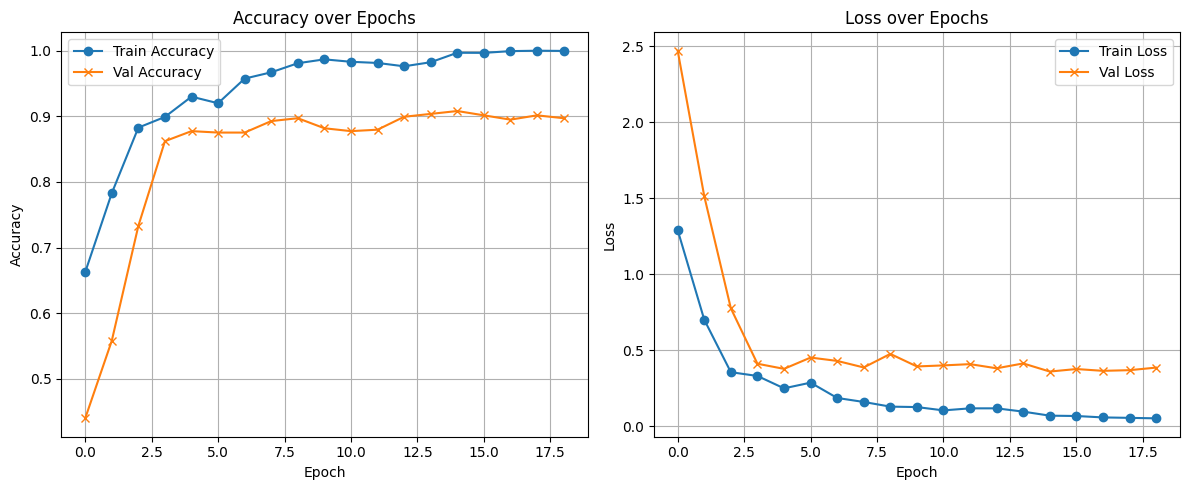

In [64]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### **The plots of accuracy and loss suggest that the model is overfitting, which is a common problem in machine learning. The confusion matrix provides a clear, granular view of the consequences of this overfitting. While the model performs well on the "notumor" and "pituitary" classes, it struggles to accurately differentiate between "glioma" and "meningioma," leading to a significant number of misclassifications between these two similar tumor types.**

-------------------------

In [65]:
y_pred_probs = model.predict(x_test) 
y_pred = np.argmax(y_pred_probs, axis=1)  

y_true = y_test  

36/36 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step


In [67]:
# classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       265
           1       0.85      0.84      0.84       269
           2       0.97      0.96      0.96       304
           3       0.95      0.99      0.97       305

    accuracy                           0.92      1143
   macro avg       0.91      0.91      0.91      1143
weighted avg       0.92      0.92      0.92      1143



#### **The model demonstrates strong overall performance with an accuracy of 92%, successfully classifying brain tumors and "notumor" cases. Its key strengths lie in correctly identifying "pituitary" and "notumor" cases. However, the model struggles more with distinguishing between "glioma" and "meningioma," as evidenced by the lower f1-scores and the misclassifications shown in the confusion matrix. The training plots for accuracy and loss further suggest that the model is overfitting, which could be the underlying reason for these specific classification challenges.**

<Figure size 1200x600 with 0 Axes>

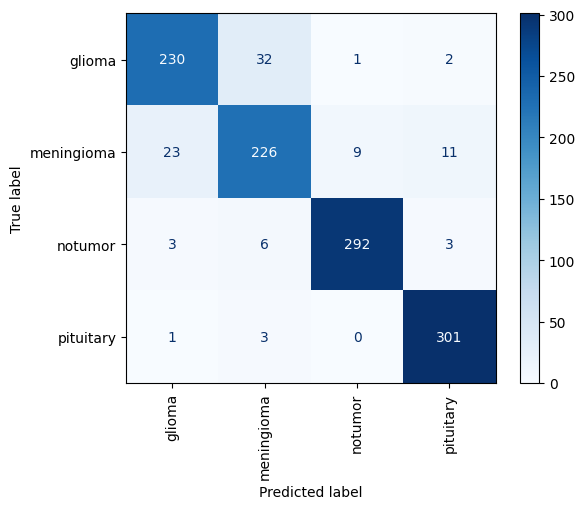

In [66]:
# Confusion matrix
plt.figure(figsize = (12,6))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(xticks_rotation='vertical', cmap='Blues')
plt.show()

#### **The machine learning model is highly successful at classifying "notumor" and "pituitary" cases. However, it struggles with the distinction between "glioma" and "meningioma" tumors, which is a key area for improvement. The training plots indicate that this challenge may be due to the model overfitting to the training data. While the model shows good overall performance, addressing the overfitting issue could lead to a more robust and accurate classifier, particularly for the more difficult "glioma" and "meningioma" classes.**

-----------------------------------
-----------------------------------

# <center><strong> Conclusion </strong></center>
### **The machine learning model demonstrates strong overall performance in classifying brain tumors and "notumor" cases, achieving a 92% accuracy. The confusion matrices consistently highlight the model's high effectiveness in identifying "pituitary" and "notumor" cases, with minimal misclassifications. However, a key area for improvement lies in the distinction between "glioma" and "meningioma" tumors, as evidenced by a higher rate of confusion and lower F1-scores for these classes. Furthermore, the training plots for accuracy and loss suggest that the model is beginning to overfit, which likely contributes to the performance drop on these more challenging classes. Addressing this overfitting could lead to a more robust and reliable classifier, particularly for the more ambiguous tumor types.**

In [3]:
!jupyter nbconvert --to html "brain-tumor.ipynb"

[NbConvertApp] Converting notebook brain-tumor.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 9887208 bytes to brain-tumor.html
